# Choosing the right Estimator/Algorithm for our data
    * classification 
    * Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
jtplot.figsize()
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
dataBoston = pd.DataFrame(boston['data'], columns = boston['feature_names'])
dataBoston['target'] = pd.Series(boston['target'])
dataBoston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# let's try the Ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
np.random.seed(45)

x = dataBoston.drop('target', axis=1)
y = dataBoston['target']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

model = Ridge()
model.fit(xTrain, yTrain)

model.score(xTest, yTest)

0.738764632590681

    What if the Ridge model is not working :

#### let's try randomForest ensemble estimator to improve the score

In [5]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(45)
x = dataBoston.drop('target', axis=1)
y = dataBoston['target']

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(xTrain, yTrain)

rf.score(xTest, yTest)

0.9051487622376674

#### Choosing the right estimator for classification problem

In [6]:
heartDisease = pd.read_csv('../pandas/heart-diseases.csv')

In [7]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### using the `LinearSVM`

In [8]:
from sklearn.svm import LinearSVC
# np.random.seed(43)
x = heartDisease.drop('target', axis=1)
y = heartDisease['target']

traiX, testX, traiY, testY = train_test_split(x, y, test_size = 0.2)

clf = LinearSVC()
clf.fit(traiX, traiY)

clf.score(testX, testY)

/home/shubhi3199/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8688524590163934

### tidbit:
    if you have structured data - use `Ensemble estimators`
    if we have instructured data(images, videos, audios) - use `Deep learning/Transfer learning`

In [9]:
# improving on the performance of the previous LinearSVC model by trying another model
from sklearn.ensemble import RandomForestClassifier
# np.random.seed(43)
x = heartDisease.drop('target', axis=1)
y = heartDisease['target']

traiX, testX, traiY, testY = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(traiX, traiY)

clf.score(testX, testY)

0.8360655737704918

## Making Predictions using trained machine learning model:
### * `predict()`
### * `predict_proba()`

In [10]:
yPreds = clf.predict(testX)
len(yPreds), len(testY)

(61, 61)

In [11]:
# Below are the 3 methods to check the accuracy of our model
np.mean(yPreds == testY)

0.8360655737704918

In [12]:
clf.score(testX, testY)

0.8360655737704918

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(testY, yPreds)

0.8360655737704918

In [14]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(testX[0:5])

array([[1.  , 0.  ],
       [0.88, 0.12],
       [0.92, 0.08],
       [0.59, 0.41],
       [0.47, 0.53]])

### `trying to predict on a regression now`

In [15]:
yPrediction = rf.predict(xTest)
yPrediction

array([18.988, 32.518, 23.327, 21.417, 42.683, 12.441, 20.858, 18.724,
       28.538, 20.792, 10.943, 15.518, 42.237, 20.112, 15.521, 18.541,
       23.831, 19.007, 10.568, 27.893, 20.702, 20.05 , 26.272, 32.234,
       20.814, 29.122, 20.987,  6.781, 22.291, 20.606, 20.314,  9.298,
       34.502, 22.658, 42.378, 26.558, 42.339, 13.859, 27.342, 31.673,
       18.451, 19.876, 15.662, 27.759, 18.318, 10.749, 25.725, 26.161,
       17.857, 19.174, 48.57 , 21.194, 23.045, 44.937, 18.404, 26.826,
        9.252, 15.199, 20.023, 19.548, 12.523, 11.952, 39.27 , 32.077,
       15.15 , 15.728, 47.868, 48.005, 28.705, 19.569, 37.933, 19.624,
       22.266, 15.481, 13.961, 25.613, 31.839, 12.439, 32.15 , 11.882,
       15.606, 12.87 , 28.277, 31.928, 23.59 , 29.438, 20.646, 15.696,
       15.761,  9.479, 24.606, 15.593, 20.164, 11.385, 26.661, 45.858,
       21.331, 14.433, 29.714, 21.209, 23.838, 33.725])

In [16]:
np.array(yTest)

array([14.4, 33. , 29.8, 21.2, 46.7, 11.5, 19.5, 16. , 25. , 19.9,  8.4,
       13.8, 42.3, 23.1, 13.8, 18.6, 28.7, 23.7, 13.1, 25. , 11.9, 18.2,
       24.1, 33.2, 20. , 23.9, 24.7,  8.5, 22.3, 18.3, 19.7,  7.2, 36.2,
       23.9, 50. , 26.5, 46. , 17.9, 27.9, 31.6, 16.8, 21.7, 23.2, 30.8,
       17.1, 10.9, 22. , 23.3, 18. , 21.4, 50. , 20.6, 22. , 39.8, 20.2,
       28.4,  7.4, 13.3, 17.5, 18.5, 11. , 12.1, 44. , 30.1, 14.5, 15.6,
       45.4, 50. , 27.5, 18.2, 50. , 23. , 24.4, 11.7, 17.8, 25. , 35.1,
        9.6, 33.8,  9.5, 13.5,  8.5, 29.8, 30.3, 23.8, 31. , 18.9, 13.9,
       16.1, 10.2, 16.5, 15.2, 19.8, 13.4, 29. , 37.6, 20.3, 17.2, 24.8,
       20.9, 23.4, 32.7])

In [17]:
from sklearn.metrics import accuracy_score
#accuracy_score(yTest, yPrediction) # cannot do this on a regression model

In [18]:
# Compare the prediction to the truth
# as in  a regression model what we get is an output data like Price etc. so we cannot use accuracy_score() 
# `but what we cam do is find out by how much is the predicted value OFF the ground truth`

from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(yTest, yPrediction)
error

2.3717450980392156

# Evaluating a machine Learning Classification model
Three Ways to evaluate our Sci-Kit learn model
 1. `Estimator score method`
 2. `The scoring parameter`
 3. `Problem-specific metric functions`

In [19]:
# we have already tried the score() method - makes a prediction array, compares it to the grond truth and results a accuracy score
clf.score(testX, testY)

0.8360655737704918

2. `Using The Cross-Validation method` 

In [20]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
np.random.seed(43)
x = heartDisease.drop('target', axis=1)
y = heartDisease['target']

trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(trainX, trainY)

clf.score(testX, testY)

0.8852459016393442

In [21]:
# calculating accuracy score usin 5 fold cross validation technique
# this is more accurate as it trains the model k times on k different train data and tests it on k test data
np.random.seed(45)
np.mean(cross_val_score(clf, x, y)), clf.score(testX, testY)

(0.811584699453552, 0.8852459016393442)

### 1.1 Classification model evaluation metrics
1. `Accuracy`
2. `Area under ROC curve`
3. `Confusion matrix`
4. `Classification report`

### 1.1.2. Area under the curve (AUC)/ ROC
 ROC curves ara a comparison of a model's true positive rate (tpr) varsus a models false positive rate (fpr)
 * `True positive = model predicts 1 when truth is 1`
 * `False Positive = modl predicts 1 when truth is 0`
 * `True Negative =  model predicts 0 when truth is 0`
 * `False Negative = model predicts 0 when truth is 1`

In [22]:
from sklearn.metrics import roc_curve
yProbs = clf.predict_proba(testX)

In [23]:
yProbs[:10]

array([[0.8 , 0.2 ],
       [0.21, 0.79],
       [0.61, 0.39],
       [0.23, 0.77],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.4 , 0.6 ],
       [0.16, 0.84],
       [0.07, 0.93],
       [0.52, 0.48]])

In [24]:
# Probability estimates of the positive class
yProbsPositive  = yProbs[:, 1]


In [25]:
fpr, tpr, threshold  = roc_curve(testY, yProbsPositive)

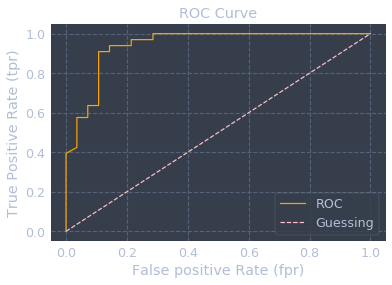

In [26]:
def plotROC(fpr, tpr):
    '''
    Plots an ROC curve given a fpr, tpr of the model!
    '''
    # plotting the ROC curve
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC');
    # plotting a base line with no prective power
    plt.plot([0,1], [0,1], color = 'pink', label = 'Guessing', linestyle = '--')
    # customizing the plot
    plt.xlabel('False positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
plotROC(fpr, tpr)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(testY, yProbsPositive)

0.941017316017316

### 1.1.3. Confusion Matrix to evaluate a classification model
* `A confusion matrix is a simple way of comparing the labels a model predicts and the actual labels the model should have predicted`
* `It's an easy way of knowing where the model is getting confused`

In [28]:
yPreds = clf.predict(testX)
yPreds

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0])

In [29]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(testY, yPreds)

In [30]:
pd.crosstab(testY,
            yPreds,
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,22,6
1,1,32


In [67]:
# Trick to install a new package directly into your working env without using terminal
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


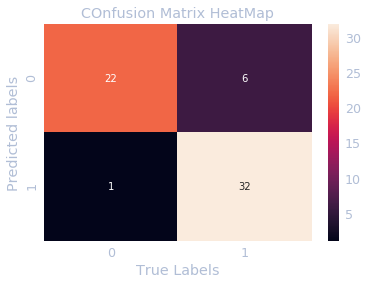

In [31]:
def plotConfusionMatrix():
    '''
    plots a confusion matrix
    '''
    fig, ax = plt.subplots()
    ax = sns.heatmap(confusionMatrix,
                     annot = True, # Annotate the heatmap with the info in confusion_matrix
                     cbar = True
                    )
    plt.xlabel('True Labels')
    plt.ylabel('Predicted labels')
    plt.title('COnfusion Matrix HeatMap')
plotConfusionMatrix()

### 1.1.4. Evaluation from Classification Report

In [32]:
from sklearn.metrics import classification_report
print(classification_report(testY, yPreds))
# T0  know more about Recall Precision and f1 score check (Machine Learning Model Evaluation.html)

              precision    recall  f1-score   support

           0       0.96      0.79      0.86        28
           1       0.84      0.97      0.90        33

    accuracy                           0.89        61
   macro avg       0.90      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



# 1.2 Evaluating a Regression model 
* `R^2 (coefficient of determination)`
* `Mean Absolute Error (MAE)`
* `Mean Squared Error (MSE)`

In [33]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(34)
rf = RandomForestRegressor()

x = dataBoston.drop('target', axis=1)
y = dataBoston['target']
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2)

rf.fit(xTrain, yTrain)
rf.score(xTest, yTest) # R^2 is applied here behind the scences

0.8877262466169952

1.2.1 * R^2 compares your models prediction to the mean of target. rf.score() can range from -inf to 1 .

In [34]:
# Another Way of implementing the rf.score() using Sci-kit learn:
from sklearn.metrics import r2_score
yPreds = rf.predict(xTest)
yTestMeanArray = np.full(len(yTest), yTest.mean())

In [35]:
yTestMeanArray, yPreds

(array([22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.29411765, 22.29411765,
        22.29411765, 22.29411765, 22.29411765, 22.2

In [36]:
r2_score(yTest, yPreds)

0.8877262466169952

### 1.2.2. Mean Absolute Error (MAE) :

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(yTest, yPreds)

In [38]:
mae

2.1546862745098037

In [39]:
df = pd.DataFrame(data = {
    'Actual Values': yTest,
    'Predicted Values': yPreds,
})
df['Difference'] =  df['Predicted Values'] - df['Actual Values'] 
df

,Actual Values,Predicted Values,Difference
218,21.5,20.955,-0.545
370,50.0,42.311,-7.689
451,15.2,15.883,0.683
230,24.3,21.985,-2.315
165,25.0,22.920,-2.080
...,...,...,...
331,17.1,19.467,2.367
352,18.6,22.680,4.080
163,50.0,47.119,-2.881
303,33.1,33.860,0.760


### 1.2.3. Mean Squared Error (MSE):


In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(yTest, yPreds)
mse

9.251947784313725

## 2. The Scoring Parameter
* `On Classification Model`
* `On Regression Model`

### 2.1 On Classification Model

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(45)

clf = RandomForestClassifier()

x = heartDisease.drop('target', axis=1)
y = heartDisease['target']

In [59]:
# when the scoring is set to `None` it takes the default scoring parameter for that model
np.random.seed(34)
cross_value_accuracy = cross_val_score(clf, x, y, cv = 5, scoring = None)
cross_value_accuracy

array([0.81967213, 0.90163934, 0.81967213, 0.81666667, 0.78333333])

In [50]:
print(f'The cross Validated accuracy is {np.mean(cross_value_accuracy) * 100:.2f}%')

The cross Validated accuracy is 82.82%


In [58]:
np.random.seed(34)
cv_accuracy = cross_val_score(clf, x, y, cv = 5, scoring = 'accuracy')
np.mean(cv_accuracy)

0.8281967213114754

In [57]:
np.random.seed(34)
cv_precision = cross_val_score(clf, x, y, cv = 5, scoring = 'precision')
np.mean(cv_precision)

0.830700575363139

In [56]:
np.random.seed(34)
cv_recall= cross_val_score(clf, x, y, cv = 5, scoring = 'recall')
np.mean(cv_recall)

0.8666666666666666

### 2.2. On Regression Model

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
np.random.seed(45)

x = dataBoston.drop('target', axis = 1)
y = dataBoston['target']

model = RandomForestRegressor()

In [62]:
# As the scoring = None :- it will use default scoring parameter for a regression i.e. R^2
cv = cross_val_score(model, x, y, cv = 5, scoring = None)
np.mean(cv)

0.6253870284809542

In [65]:
cv_r2 = cross_val_score(model, x, y, cv = 5, scoring = 'r2')
np.mean(cv_r2)

0.6314970727650686

In [66]:
cv_mae = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_absolute_error')
np.mean(cv_mae)

-2.980484080761017

In [67]:
cv_mse = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
np.mean(cv_mse)

-21.824297908211996